Task 1
Web scraping and analysis
This Jupyter notebook includes some code to get you started with web scraping. We will use a package called BeautifulSoup to collect the data from the web. Once you've collected your data and saved it into a local .csv file you should start with your analysis.

Scraping data from Skytrax
If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use Python and BeautifulSoup to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | I am beyond upset and disgusted...
1,✅ Trip Verified | I purchased round trip dir...
2,Not Verified | I booked two business class sea...
3,Not Verified | Although all four flights were ...
4,✅ Trip Verified | Flight changed just one da...


In [4]:
df


,reviews
0,Not Verified | I am beyond upset and disgusted...
1,✅ Trip Verified | I purchased round trip dir...
2,Not Verified | I booked two business class sea...
3,Not Verified | Although all four flights were ...
4,✅ Trip Verified | Flight changed just one da...
...,...
995,✅ Trip Verified | New York to Glasgow via Lond...
996,✅ Trip Verified | London Heathrow to New York....
997,✅ Trip Verified | Gatwick to Bermuda. Boarded...
998,✅ Trip Verified | London Heathrow to Larnaca....


In [5]:
df.reviews= df.reviews.str.split('|',expand=True)[1]


In [6]:
df

,reviews
0,I am beyond upset and disgusted with the disr...
1,I purchased round trip direct flight busine...
2,I booked two business class seats. We had a m...
3,Although all four flights were delayed the se...
4,Flight changed just one day before from Bri...
...,...
995,New York to Glasgow via London. A routine and...
996,London Heathrow to New York. The staff went a...
997,Gatwick to Bermuda. Boarded very quickly and...
998,London Heathrow to Larnaca. Perfect. The ear...


Rule-based approach

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

Data preprocessing steps:

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

Step 1: Cleaning the text

In [7]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,I am beyond upset and disgusted with the disr...,I am beyond upset and disgusted with the disr...
1,I purchased round trip direct flight busine...,I purchased round trip direct flight business...
2,I booked two business class seats. We had a m...,I booked two business class seats We had a me...
3,Although all four flights were delayed the se...,Although all four flights were delayed the se...
4,Flight changed just one day before from Bri...,Flight changed just one day before from Briti...


Step 2: Tokenization
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

Step 3: Enrichment – POS tagging
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

NLTK is a leading platform for building Python programs to work with human language data. 

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries

In [8]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vasan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vasan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vasan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vasan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vasan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,I am beyond upset and disgusted with the disr...,I am beyond upset and disgusted with the disr...,"[(beyond, None), (upset, n), (disgusted, v), (..."
1,I purchased round trip direct flight busine...,I purchased round trip direct flight business...,"[(purchased, v), (round, n), (trip, n), (direc..."
2,I booked two business class seats. We had a m...,I booked two business class seats We had a me...,"[(booked, v), (two, None), (business, n), (cla..."
3,Although all four flights were delayed the se...,Although all four flights were delayed the se...,"[(Although, None), (four, None), (flights, n),..."
4,Flight changed just one day before from Bri...,Flight changed just one day before from Briti...,"[(Flight, n), (changed, v), (one, None), (day,..."


In [10]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,I am beyond upset and disgusted with the disr...,I am beyond upset and disgusted with the disr...,"[(beyond, None), (upset, n), (disgusted, v), (...",beyond upset disgust disregard lack knowledg...
1,I purchased round trip direct flight busine...,I purchased round trip direct flight business...,"[(purchased, v), (round, n), (trip, n), (direc...",purchase round trip direct flight business c...
2,I booked two business class seats. We had a m...,I booked two business class seats We had a me...,"[(booked, v), (two, None), (business, n), (cla...",book two business class seat medical emergen...
3,Although all four flights were delayed the se...,Although all four flights were delayed the se...,"[(Although, None), (four, None), (flights, n),...",Although four flight delay service offer BA ...
4,Flight changed just one day before from Bri...,Flight changed just one day before from Briti...,"[(Flight, n), (changed, v), (one, None), (day,...",Flight change one day British Airways Titan ...


In [11]:
df[['reviews','Lemma']]


,reviews,Lemma
0,I am beyond upset and disgusted with the disr...,beyond upset disgust disregard lack knowledg...
1,I purchased round trip direct flight busine...,purchase round trip direct flight business c...
2,I booked two business class seats. We had a m...,book two business class seat medical emergen...
3,Although all four flights were delayed the se...,Although four flight delay service offer BA ...
4,Flight changed just one day before from Bri...,Flight change one day British Airways Titan ...
...,...,...
995,New York to Glasgow via London. A routine and...,New York Glasgow via London routine smooth o...
996,London Heathrow to New York. The staff went a...,London Heathrow New York staff go beyond mak...
997,Gatwick to Bermuda. Boarded very quickly and...,Gatwick Bermuda Boarded quickly time Seating...
998,London Heathrow to Larnaca. Perfect. The ear...,London Heathrow Larnaca Perfect early mornin...


Sentiment Analysis using VADER
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [12]:
!pip install vaderSentiment


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,I am beyond upset and disgusted with the disr...,I am beyond upset and disgusted with the disr...,"[(beyond, None), (upset, n), (disgusted, v), (...",beyond upset disgust disregard lack knowledg...,-0.9462,Negative
1,I purchased round trip direct flight busine...,I purchased round trip direct flight business...,"[(purchased, v), (round, n), (trip, n), (direc...",purchase round trip direct flight business c...,-0.8720,Negative
2,I booked two business class seats. We had a m...,I booked two business class seats We had a me...,"[(booked, v), (two, None), (business, n), (cla...",book two business class seat medical emergen...,-0.2732,Negative
3,Although all four flights were delayed the se...,Although all four flights were delayed the se...,"[(Although, None), (four, None), (flights, n),...",Although four flight delay service offer BA ...,0.8883,Positive
4,Flight changed just one day before from Bri...,Flight changed just one day before from Briti...,"[(Flight, n), (changed, v), (one, None), (day,...",Flight change one day British Airways Titan ...,0.1280,Neutral


In [14]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    466
Negative    423
Neutral     111
Name: count, dtype: int64

Visual Representation

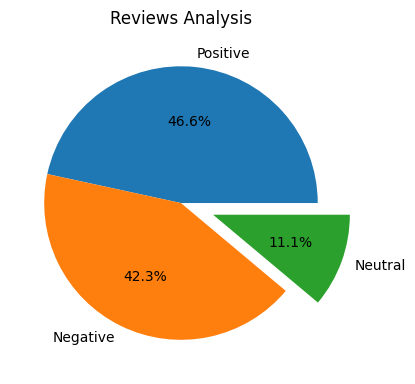

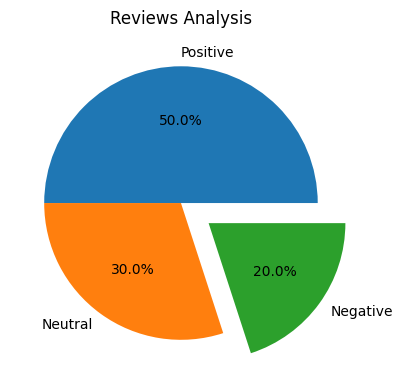

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data for demonstration
vader_counts = pd.Series([50, 30, 20], index=['Positive', 'Neutral', 'Negative'])

plt.figure(figsize=(15, 7))

# Plot pie chart in the second subplot
plt.subplot(1, 3, 2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels=vader_counts.index, explode=(0, 0, 0.25), autopct='%1.1f%%', shadow=False)

plt.show()